<a href="https://colab.research.google.com/github/liicuba/gz-dbt-repository/blob/main/3_Enrich_users_profiles_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 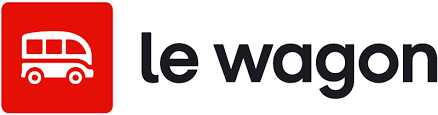

# Enrich users profiles

In this challenge, you will explore a dataset of companies and extract companies information from it!


## General data exploration




Import the [`microsoft_companies.json`](https://drive.google.com/

---

file/d/1Zrja9KY-05u8XsGfK-P97zGa-NyipS49/view?usp=sharing) file into Colab.

Run the code below to get the results in the `microsoft_companies` variable. We will study on Day 3 how to load data in Python.

In [ ]:
import json

with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)



What is the type of the `microsoft_companies` variable?

---



*   Item da lista
*   Item da lista





In [ ]:
#your code here

#import libary jason
import json

#uploading the jason file on the project
with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

#finding the type of the variable
type_of_variable = type (microsoft_companies)
print(f'Data type of microsoft_companies is: {type_of_variable}')  # Output: Data type of microsoft_companies is: <class 'list'>

Data type of microsoft_companies is: <class 'list'>


How many companies are in this list?

In [ ]:
#your code here

# Count the number of cities
number_of_companies = len(microsoft_companies)

print(f'Number of companies: {number_of_companies}')  # Output: Number of companies: 301

Number of companies: 301


## Specific data exploration


Look at the first item on this list. What type is it?


In [ ]:
#your code here

import json

#uploading the jason file on the project
with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)


#displaying list size
print("Length of list1:", len(microsoft_companies)) #output: 301

#display the first element of the list list_example
print("First element of list1:", microsoft_companies[0]) #output: a dictionary

#finding the type of the variable
type_of_variable = type (microsoft_companies[0])
print(f'Data type of the first lists item is: {type_of_variable}') #output: Data type of the first lists item is: <class 'dict'>

Length of list1: 301
First element of list1: {'datasetid': 'companies-on-linkedin', 'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f', 'fields': {'total_employee_estimate': 44, 'size_range': '11 - 50', 'industry': 'computer games', 'linkedin_url': 'https://www.linkedin.com/company/develop-magazine', 'domain0': 'https://www.develop-online.net', 'current_employee_estimate': 6, 'name': 'microsoft'}, 'record_timestamp': '2019-06-03T09:35:00+02:00'}
Data type of the first lists item is: <class 'dict'>


In [ ]:

import json

#uploading the jason file on the project
with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

# Access the first item in the list
first_company = microsoft_companies[0]

# Display the specific details of the first item
name = first_company["fields"]['name']
industry = first_company["fields"]["industry"]
domain = first_company["fields"]["domain0"]
current_employee_estimate = first_company["fields"]["current_employee_estimate"]

# Print microsoft_companies first item details
print(f"Company Name: {name}")
print(f"Industry: {industry}")
print(f"Domain: {domain}")
print(f"Total Number of Employees: {current_employee_estimate}")




Company Name: microsoft
Industry: computer games
Domain: https://www.develop-online.net
Total Number of Employees: 6


For this first item, display the company name, industry, domain and total number of employees.

Do you think that this company named "microsoft" is the giant American company?

> **Your Answer Here (Double click)**


Obviously not ! It seems there are homonyms in our list.

Create a new empty list and add all the companies whose names are exactly "microsoft".

To do this, you will need to loop through all the companies and use a condition to check that their names are indeed "microsoft". If this is the case, the company information will be added to the empty list.

How many are there?

In [ ]:
filtered_companies = []

# Filter companies named "microsoft" (case-insensitive)
for company in microsoft_companies:
  company_name = company.get("fields", {}).get("name")  # Handle potential missing "fields" key
  if company_name and company_name.lower() == "microsoft":  # Case-insensitive match
    filtered_companies.append(company)

# Print the number of companies named "microsoft"
print(f"Number of companies named 'microsoft': {len(filtered_companies)}")

Number of companies named 'microsoft': 6


Among the results obtained, do you see the giant American company?

You can run the code below and then use the `pprint` function to indent the results. It works like the `print` function with improved readability.

In [ ]:
#function to indent the results printed
from pprint import pprint
pprint(filtered_companies)

[{'datasetid': 'companies-on-linkedin',
  'fields': {'current_employee_estimate': 6,
             'domain0': 'https://www.develop-online.net',
             'industry': 'computer games',
             'linkedin_url': 'https://www.linkedin.com/company/develop-magazine',
             'name': 'microsoft',
             'size_range': '11 - 50',
             'total_employee_estimate': 44},
  'record_timestamp': '2019-06-03T09:35:00+02:00',
  'recordid': 'c4d310fc0f0f277e574e20f5e2185d4765a1ab3f'},
 {'datasetid': 'companies-on-linkedin',
  'fields': {'country': 'united states',
             'current_employee_estimate': 116196,
             'domain0': 'https://www.microsoft.com',
             'industry': 'computer software',
             'linkedin_url': 'https://www.linkedin.com/company/microsoft',
             'locality': 'redmond,washington,united states',
             'name': 'microsoft',
             'size_range': '10001+',
             'total_employee_estimate': 276983,
             'year_f

> **Your Answer Here (Double click)**

{'datasetid': 'companies-on-linkedin',
  'fields': {'country': 'united states',
             'current_employee_estimate': 116196,
             'domain0': 'https://www.microsoft.com',
             'industry': 'computer software',
             'linkedin_url': 'https://www.linkedin.com/company/microsoft',
             'locality': 'redmond,washington,united states',
             'name': 'microsoft',
             'size_range': '10001+',
             'total_employee_estimate': 276983,
             'year_founded': '1975'},
  'record_timestamp': '2019-06-03T09:35:00+02:00',
  'recordid': 'd8611a51def434f1049b899a99d8a589fbb7b9c1'},


## Cleaning the data


### Encoding categories

To facilitate the work of the other teams, we will translate the number of employees into categories. To do this, we will use the following correspondences:
   - less than 5: "small business"
   - from 5 to 30: "startup"
   - from 30 to 200: "scaleup"
   - from 200 to 1000: "big companies"
   - more than 1000: "very large companies"


Write a function that takes one argument, the number of employees, and returns the corresponding category.

⚠️ Don't forget to return the corresponding category at the end of your function using the **return** keyword. \
Look carefully at the syntax of functions in the lecture.


In [ ]:
def from_nb_employee_to_category(total_employee):


  # to be completed
  if total_employee < 5:
    return "small business"
  elif total_employee < 30:
    return "startup"
  elif total_employee < 200:
    return "scaleup"
  elif total_employee < 1000:
    return "big companies"
  else:
    return "very large companies"

total_employee = 199

category = from_nb_employee_to_category(total_employee)

print(f"Employee Category: {category}")

Employee Category: scaleup


### Transform the data


We will go through all the companies in the initial file.

We will create an empty list that will record all the information about each company as we go along.

For each company, store in a **dictionary** the company's name, industry, domain and company category (in relation to its number of employees, using your previous function). Then add this dictionary to your list.

In the end, your list will contain all the dictionaries of all the companies.

In [ ]:
#uploading the jason file on the project
with open('/content/microsoft_companies.json') as json_file:
    microsoft_companies = json.load(json_file)

# Create an empty list to store company information dictionaries
microsoft_companies_clean = []

# Process each company
for company_info in microsoft_companies:
  # Access company information
  company_name = company.get("fields", {}).get("name")
  industry = company.get("fields", {}).get("industry")
  domain = company.get("fields", {}).get("domain0")
  employee_count = company.get("fields", {}).get("current_employee_estimate")

  # Get employee category
  if employee_count is not None:
    category = get_employee_category(employee_count)
  else:
    category = "Employee count information not available"

  # Create company information dictionary and add it to the list
  company_data = {
      "name": company_name,
      "industry": industry,
      "domain": domain,
      "employee_category": category
  }
  all_companies.append(company_data)

# Print information about all companies (optional)
print("\nInformation about all companies:")
for company in all_companies:
  print(f"\n  Company Name: {company['name']}")
  print(f"  Industry: {company['industry']}")
  print(f"  Domain: {company['domain']}")
  print(f"  Employee Category: {company['employee_category']}")#PAREI AQUI!!!!!!!

Use the code below to create a `DataFrame` from it. We will learn more about this Python object in future lectures.

In [ ]:
import pandas as pd

df_microsoft_companies_clean = pd.DataFrame(microsoft_companies_clean)
df_microsoft_companies_clean


Congratulations, you just created your first DataFrame! 🚀

### More accurate cleaning


What do you notice about `domains` column ?

When no domain has been found, the API outputs "https://www.".

This piece of information is not relevant to other teams. Modify your code to delete that.


<details>
    <summary>Hint 🔍</summary>
One way to do so is to not store this key/value pair when iterating over all companies.
</details>

In [ ]:
#your code here

Run the code below to export the clean dataframe to a CSV. We will learn more about the `to_csv()`function in future lectures.


In [ ]:
df_microsoft_companies_clean.to_csv("microsoft_companies.csv",index=False)